# Exploratory Data Analysis

In [54]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

### 01. Reading the data

In [14]:
DATA_DIR = Path("./data/")
df = pd.read_csv(DATA_DIR / "train.csv")

In [15]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 02. Plot Data

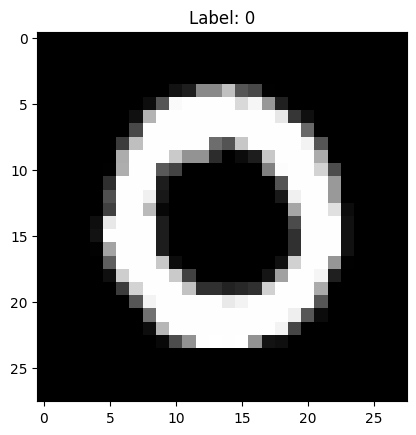

In [21]:
index = 1

pixels = df.filter(like="pixel")
sample_digit = pixels.iloc[index].values
sample_digit = sample_digit.reshape(28, 28)
plt.imshow(sample_digit, cmap="gray")
plt.title(f"Label: {df.label.iloc[index]}");

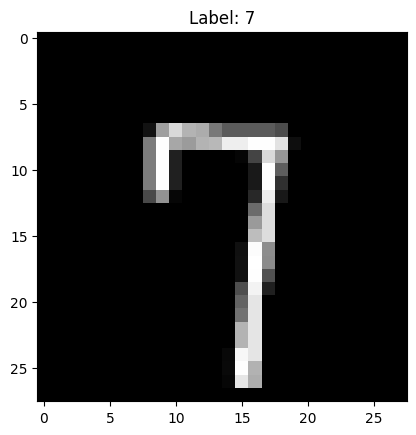

In [28]:
# 아주 원시적인 함수화
# 이 때 df는 밖에서 정의되어 있다는 점에 유의.
def vector2img(index):
    pixels = df.filter(like="pixel")
    sample_digit = pixels.iloc[index].values
    sample_digit = sample_digit.reshape(28, 28)
    plt.imshow(sample_digit, cmap="gray")
    plt.title(f"Label: {df.label.iloc[index]}");
    return sample_digit
vector2img(50);

In [30]:
# 그림 그리는 걸 옵션으로 넣어주기
def vector2img(index, plot_digit=False):
    pixels = df.filter(like="pixel")
    sample_digit = pixels.iloc[index].values
    sample_digit = sample_digit.reshape(28, 28)
    if plot_digit:
        plt.imshow(sample_digit, cmap="gray")
        plt.title(f"Label: {df.label.iloc[index]}");
    return sample_digit

In [32]:
vector2img(5500);

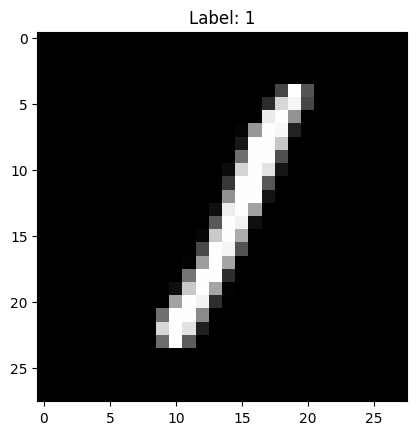

In [33]:
vector2img(5500, plot_digit=True);

In [ ]:
# Typehints
def vector2img(index: int, plot_digit: bool = False):
    pixels = df.filter(like="pixel")
    sample_digit = pixels.iloc[index].values
    sample_digit = sample_digit.reshape(28, 28)
    if plot_digit:
        plt.imshow(sample_digit, cmap="gray")
        plt.title(f"Label: {df.label.iloc[index]}");
    return sample_digit

In [48]:
from torch.utils.data import Dataset, DataLoader


class DigitDataset(Dataset):
    
    def __init__(self, data_dir: Path | str = Path("data/"), file_name: str = "train.csv") -> None:
        data = pd.read_csv(data_dir / file_name)
        self.labels: np.ndarray = data["label"].values
        self.digits: np.ndarray = data.filter(like="pixel").values
        
    def __getitem__(self, index):
        X = self.digits[index].reshape(28, 28)
        y = self.labels[index]
        return X, y

    def __len__(self):
        return len(self.labels)

In [52]:
ds = DigitDataset()
dl = DataLoader(dataset=ds, batch_size=16)

X, y = next(iter(dl))

X.shape, y.shape

(torch.Size([16, 28, 28]), torch.Size([16]))

In [60]:
def plot_torch_tensor(X: torch.Tensor, y: torch.Tensor = None, index: int = None):

    if index is not None:
        assert X.ndim == 3
        X = X[index]
    else:
        assert X.ndim == 2 and isinstance(index, int)
    X = X.numpy()
    plt.imshow(X, cmap="gray");
    if y is not None:
        label = y if y.ndim == 0 else y[index]
        plt.title(f"Label: {label}")

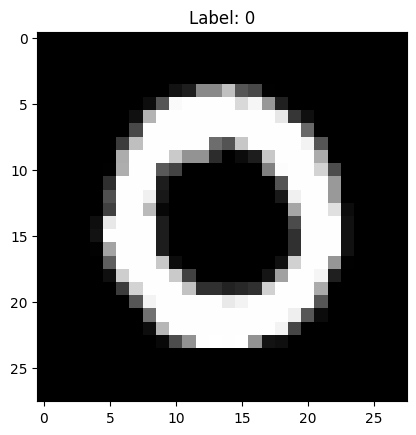

In [61]:
plot_torch_tensor(X=X, y=y, index=1)

In [80]:
def _plot_tensor(X: torch.Tensor, y: torch.Tensor = None, ax=None):

    assert X.ndim == 2, f"Please provide n*n array. Given: {X.ndim}, {X.shape}"
    if ax is None:
        fig, ax = plt.subplots()
    X = X.numpy()
    ax.imshow(X, cmap="gray");
    if y is not None:
        ax.set_title(f"Label: {y}")
        ax.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

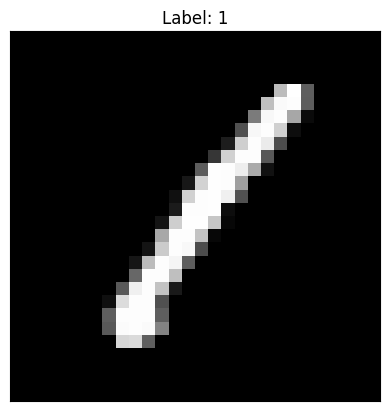

In [81]:
_plot_tensor(X[0], y[0])

In [82]:
def plot_tensors(X: torch.Tensor, y: torch.Tensor):
    fig, _ax = plt.subplots(figsize=(6, 3), nrows=2, ncols=4)
    for i in range(8):
        r, c = i // 4, i % 4
        ax = _ax[r, c]
        _plot_tensor(X=X[i], y=y[i], ax=ax)
    fig.tight_layout()

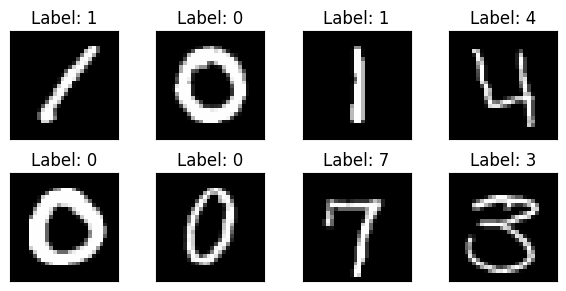

In [83]:
plot_tensors(X=X, y=y)

### 03. Augmentations
Visit below links
- [List of Transforms](https://pytorch.org/vision/stable/transforms.html)
- [For actual usage](https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py)

In [ ]:
import torchvision.transforms as tfm

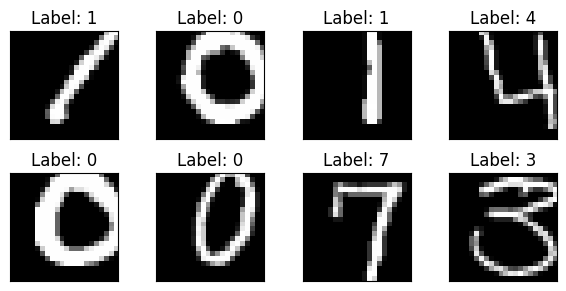

In [ ]:
c = tfm.RandomCrop(size=(22, 22))
cropped_img = c(X)
plot_tensors(X=cropped_img, y=y)

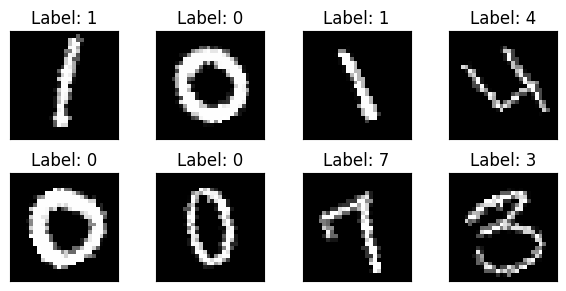

In [95]:
r = tfm.RandomRotation(degrees=(-60, 60))
rotated_img = r(X)
plot_tensors(X=rotated_img, y=y)

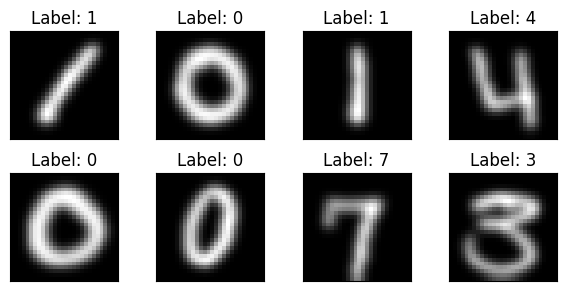

In [99]:
b = tfm.GaussianBlur(kernel_size=7)
blurred_img = b(X)
plot_tensors(X=blurred_img, y=y)

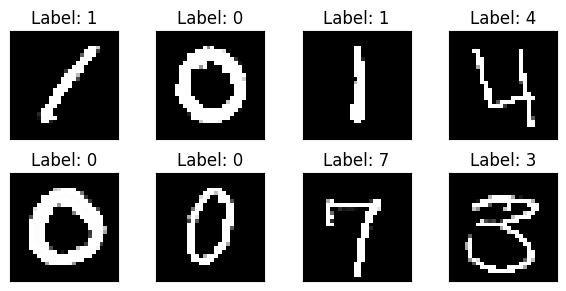

In [104]:
s = tfm.RandomAdjustSharpness(sharpness_factor=10, p=1)
sharpness_img = s(X.unsqueeze(dim=1))
plot_tensors(X=sharpness_img.squeeze(), y=y)